 **Books Recommendation System**
---
Oleh: [Sulhan Fuadi](https://github.com/sulhanfuadi)

## **Deskripsi Proyek**

### **Latar Belakang Proyek Books Recommendation System**

Proyek ini bertujuan untuk mengembangkan **Books Recommendation System** yang mampu memberikan rekomendasi buku secara personal berdasarkan preferensi pembaca. Dalam era digital yang dipenuhi informasi, pembaca menghadapi tantangan untuk menemukan bacaan yang sesuai di tengah banyaknya pilihan. Meskipun toko buku online dan layanan digital memberikan akses lebih luas, jumlah opsi yang besar justru bisa mempersulit pembaca dalam menentukan bacaan yang tepat, sehingga menghambat kegairahan membaca.

Proyek ini menggunakan pendekatan machine learning untuk memberikan rekomendasi buku yang akurat dengan menggabungkan teknik **Content-Based Filtering** dan **Collaborative Filtering**. Selain memudahkan pembaca, sistem ini juga memiliki potensi untuk mendukung penulis dan penerbit dalam menjangkau audiens yang lebih luas dan meningkatkan penjualan dengan menyediakan rekomendasi yang sesuai dengan minat individu.

Untuk mengembangkan model ini, **[Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)** dari Book-Crossing yang berisi data demografi pengguna dan peringkat buku (eksplisit/implisit) akan digunakan. Dataset ini dikumpulkan selama 4 minggu dari komunitas Book-Crossing pada tahun 2004. Dengan memanfaatkan dataset ini, sistem rekomendasi diharapkan dapat memberikan pengalaman membaca yang lebih menarik dan bermanfaat bagi semua pihak yang terlibat dalam ekosistem buku.

### **Tujuan dan Manfaat Proyek**
Proyek Books Recommendation System ini dirancang dengan beberapa tujuan utama:
1. **Akurasi Rekomendasi Buku**: Menghasilkan rekomendasi buku yang relevan dan sesuai dengan preferensi individu pembaca menggunakan teknik machine learning yang terlatih pada data historis.
2. **Peningkatan Minat Baca**: Mendorong pembaca untuk menemukan buku yang sesuai dengan minat mereka, sehingga meningkatkan kegairahan membaca.
3. **Dukungan untuk Industri Buku**: Membantu penulis, penerbit, dan penjual buku untuk menjangkau audiens yang lebih luas dan meningkatkan peluang penjualan melalui sistem rekomendasi yang tepat sasaran.

Dengan model rekomendasi yang akurat, proyek ini diharapkan dapat memberikan solusi yang mendukung perkembangan literasi dan industri buku secara lebih efisien dan berbasis data.


## 1. Import Library

Di tahap ini, library-library yang diperlukan akan di-import.

In [1]:
!pip install -q kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tabulate import tabulate

## 2. Data Understanding  

Data Understanding adalah proses untuk memahami informasi yang terdapat dalam data dan menilai kualitas data tersebut. Berikut adalah beberapa tahapan untuk memahami data yang akan dilakukan pada proyek ini:
1. Data Loading
2. Univariate Exploratory Data Analysis
3. Data Preprocessing

### 2.1 Data Loading

Data Loading adalah tahap memuat dataset yang akan digunakan sehingga dataset tersebut lebih mudah dipahami.

<br>


**Informasi Datasets**


| Jenis | Keterangan |
| ------ | ------ |
| Title | Book Recommendation Dataset |
| Source | [Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/) |
| Maintainer | [Möbius](https://www.kaggle.com/arashnic) |
| License | CC0: Public Domain |
| Visibility | Public |
| Tags | Online Communities, Literature, Art, Recommender Systems, Culture and Humanities |
| Usability | 10.00 |

In [ ]:
from google.colab import files

files.upload()

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
 86% 21.0M/24.3M [00:01<00:00, 21.3MB/s]
100% 24.3M/24.3M [00:01<00:00, 22.4MB/s]


In [6]:
import zipfile

zip_ref = zipfile.ZipFile('/content/book-recommendation-dataset.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

Baca dataset dengan menggunakan fungsi pandas.read_csv. Implementasikan kode berikut.

In [7]:
# load the dataset
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")

<ipython-input-7-242f986d8491>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [8]:
# dataset books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
# Konversi dataframe ke dalam format markdown
# print(tabulate(books.head(), tablefmt="pipe", headers="keys"))

In [10]:
# dataset ratings
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
# dataset users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
print('Total buku:', len(books.ISBN.unique()))
print('Total rating buku:', len(ratings.ISBN.unique()))
print('Total user:', len(users['User-ID'].unique()))

Total buku: 271360
Total rating buku: 340556
Total user: 278858


Berdasarkan hasil analisis dataset, diperoleh informasi berikut:

- **Variabel `books`**:
  - Berisi 271.360 jenis buku dengan 8 kolom data:
    - `ISBN`: Nomor identitas unik untuk setiap buku.
    - `Book-Title`: Judul buku.
    - `Book-Author`: Nama penulis buku.
    - `Year-Of-Publication`: Tahun penerbitan buku.
    - `Publisher`: Nama penerbit buku.
    - `Image-URL-S`: URL gambar ukuran kecil.
    - `Image-URL-M`: URL gambar ukuran sedang.
    - `Image-URL-L`: URL gambar ukuran besar.

- **Variabel `ratings`**:
  - Memuat 340.556 penilaian buku, terdiri dari 3 kolom:
    - `User-ID`: Kode unik pengguna anonim yang memberikan penilaian.
    - `ISBN`: Nomor identitas buku yang dinilai.
    - `Book-Rating`: Skor penilaian yang diberikan kepada buku.

- **Variabel `users`**:
  - Terdiri dari 278.858 pengguna anonim dengan 3 kolom:
    - `User-ID`: Kode unik untuk pengguna anonim.
    - `Location`: Lokasi tempat tinggal pengguna.
    - `Age`: Usia pengguna.

### 2.2 Univariate Exploratory Data Analysis (EDA)

Pada tahap ini, dilakukan analisis dan eksplorasi untuk memahami distribusi serta karakteristik masing-masing variabel. Pemahaman ini penting untuk menentukan pendekatan atau algoritma yang paling sesuai untuk diterapkan pada data. Berikut adalah variabel-variabel dalam *Book Recommendation Dataset*:

- **`books`**: Berisi informasi terkait buku.
- **`ratings`**: Memuat data penilaian atau skor yang diberikan pengguna terhadap buku.
- **`users`**: Berisi informasi pengguna, termasuk data demografi.


#### **2.2.1 Books Variabel**

Langkah pertama adalah memeriksa isi dataset pada variabel `books` dan meninjau informasi yang terkandung di dalamnya menggunakan fungsi `info()`.

In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berdasarkan output, dataset `books.csv` terdiri dari 271.360 entri dan memiliki 8 kolom: `ISBN`, `Book-Title`, `Book-Author`, `Year-Of-Publication`, `Publisher`, `Image-URL-S`, `Image-URL-M`, dan `Image-URL-L`. Ditemukan bahwa kolom `Year-Of-Publication` bertipe data *object*, meskipun secara umum tahun publikasi seharusnya bertipe *integer*. Oleh karena itu, tipe data pada kolom ini akan diperbaiki terlebih dahulu.

Ketika menjalankan kode berikut:  
```
books['Year-Of-Publication'].astype('int')
```

Muncul error `ValueError: invalid literal for int() with base 10: 'DK Publishing Inc'` terjadi saat mencoba mengonversi kolom `Year-Of-Publication` menjadi tipe *integer*. Hal ini disebabkan adanya nilai berbentuk teks pada kolom tersebut, yaitu `'DK Publishing Inc'`. Setelah dilakukan penelusuran lebih lanjut, ditemukan dua nilai teks yang bermasalah, yakni `'DK Publishing Inc'` dan `'Gallimard'`. Kedua nilai ini merupakan kesalahan input dan akan dihapus sebelum kolom diubah ke tipe data *integer*.


In [14]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Nilai pada kolom `Year-Of-Publication` yang berupa teks akan dihapus untuk memastikan hanya data valid yang tersisa sebelum konversi ke tipe data *integer*.

In [15]:
temp = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


Tipe data pada kolom `Year-Of-Publication` akan diubah menjadi *integer* setelah nilai-nilai bermasalah dihapus.

In [16]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


Tipe data pada kolom `Year-Of-Publication` sekarang sudah berhasil diubah menjadi *integer*. Langkah selanjutnya adalah menghapus kolom yang tidak relevan untuk proses pengembangan model. Karena sistem rekomendasi berbasis konten (content-based filtering) akan memberikan rekomendasi berdasarkan judul buku dan nama penulis yang pernah dibaca oleh pengguna, maka informasi tentang ukuran gambar tidak diperlukan. Oleh karena itu, kolom `Image-URL-S`, `Image-URL-M`, dan `Image-URL-L` akan dihapus.


In [17]:
books.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Setelah kolom `Image-URL` dihapus, dataset sekarang hanya terdiri dari 5 kolom atau variabel. Untuk melihat jumlah entri pada setiap variabel, jalankan kode berikut.

In [18]:
print("Total Jumlah ISBN Buku:", len(books['ISBN'].unique()))
print("Total Judul Buku Keseluruhan:", len(books['Book-Title'].unique()))
print('Total Jumlah Penulis Buku Terdaftar:', len(books['Book-Author'].unique()))
print('Total Jumlah Tahun Publikasi Terdaftar:', len(books['Year-Of-Publication'].unique()))
print('Total Nama Penerbit Terdaftar:', len(books['Publisher'].unique()))

Total Jumlah ISBN Buku: 271357
Total Judul Buku Keseluruhan: 242132
Total Jumlah Penulis Buku Terdaftar: 102021
Total Jumlah Tahun Publikasi Terdaftar: 116
Total Nama Penerbit Terdaftar: 16805


Berdasarkan output di atas, jumlah entri untuk masing-masing variabel telah diketahui. Dataset mencatat 242.135 judul buku, sedangkan jumlah nomor ISBN adalah 271.357. Perbedaan ini menunjukkan adanya ketidaksesuaian, di mana beberapa buku tidak memiliki nomor ISBN yang unik. Padahal, setiap buku seharusnya memiliki satu nomor ISBN yang bersifat unik. Ketidaksesuaian ini bisa disebabkan oleh data duplikat atau kesalahan entri. Untuk menangani masalah ini, dataset akan difilter agar setiap buku hanya memiliki satu nomor ISBN yang unik sebelum digunakan dalam pengembangan model.

Selanjutnya, akan dilakukan analisis distribusi data untuk mengidentifikasi 10 nama penulis dengan jumlah buku terbanyak dalam dataset.

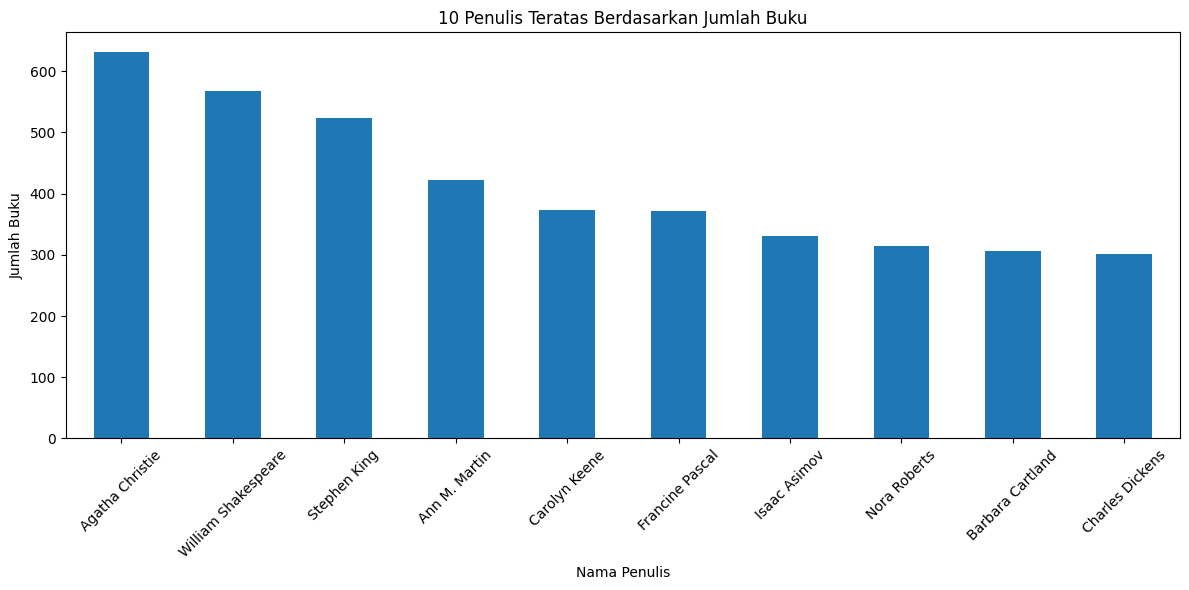

In [19]:
# Grouping'Book-Author' dan hitung jumlah buku yang ditulis oleh masing-masing penulis
author_counts = books.groupby('Book-Author')['Book-Title'].count()

# Urutkan penulis dalam urutan menurun
sorted_authors = author_counts.sort_values(ascending=False)

# Pilih 10 penulis teratas
top_10_authors = sorted_authors.head(10)

# Plot 10 penulis teratas dan buku yang ditulis oleh penulis kemudian dihitung menggunakan plot batang
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Nama Penulis')
plt.ylabel('Jumlah Buku')
plt.title('10 Penulis Teratas Berdasarkan Jumlah Buku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan informasi di atas, diketahui bahwa penulis dengan nama Agatha Christie menulis lebih dari 600 buku, jumlah terbanyak dalam dataset. Selain itu, informasi ini juga menunjukkan bahwa beberapa penulis di dalam dataset memiliki lebih dari satu judul buku.

#### **2.2.2 Ratings Variabel**

Selanjutnya, akan dilakukan eksplorasi pada variabel `ratings`, yang berisi penilaian buku oleh pembaca atau pengguna. Dataset rating ini akan digunakan dalam proses pengembangan model dengan teknik collaborative filtering. Gunakan fungsi `info()` untuk melihat informasi lebih lanjut mengenai variabel tersebut.

In [20]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Berdasarkan output di atas, diketahui bahwa terdapat 1.149.780 entri dengan 3 kolom: `User-ID`, yang merupakan kode unik pengguna anonim yang memberikan rating; `ISBN`, yang merupakan nomor identitas unik buku; dan `Book-Rating`, yang merupakan penilaian buku dari pembaca atau pengguna. Untuk melihat jumlah entri pada masing-masing kolom, jalankan kode berikut.

In [21]:
print('Jumlah Total User-ID:', len(ratings['User-ID'].unique()))
print('Jumlah Seluruh Buku Berdasarkan ISBN-nya:', len(ratings['ISBN'].unique()))

print('Jumlah Keseluruhan Rating Buku:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Jumlah': sorted_ratings.values})

Jumlah Total User-ID: 105283
Jumlah Seluruh Buku Berdasarkan ISBN-nya: 340556
Jumlah Keseluruhan Rating Buku:


,Book-Rating,Jumlah
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


Berdasarkan output di atas, diketahui bahwa terdapat 105.283 pengguna yang memberikan rating buku. Jumlah buku berdasarkan `ISBN` yang diberikan rating mencapai 340.556, dan nilai rating yang diberikan oleh masing-masing pengguna berkisar antara 0 hingga 10, dengan 0 sebagai rating terendah dan 10 sebagai rating tertinggi.

Seperti yang terlihat sebelumnya, dataset `ratings` memiliki 1.149.780 baris data, jumlah yang sangat besar. Dataset ini akan digunakan dalam proses pengembangan model dengan collaborative filtering. Untuk menghemat alokasi memori selama pelatihan model, dataset rating tidak akan digunakan secara keseluruhan. Hanya data dari baris pertama hingga baris ke-20.000 yang akan diambil. Dataset ini akan digunakan untuk model collaborative filtering karena memerlukan data rating pengguna untuk memberikan rekomendasi judul buku kepada pengguna lainnya. Untuk menghindari kebingungannya dengan fitur lain yang serupa, variabel ini akan diubah namanya menjadi `df_rating`.

In [22]:
df_rating = ratings[:20000]
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
19995,3757,843222264X,7
19996,3757,8432222658,7
19997,3757,8432222666,7
19998,3757,8432222674,7


#### **2.2.3 Users Variabel**

Variabel terakhir yang akan dieksplorasi adalah variabel `users`, yang berisi informasi mengenai pengguna anonim beserta data demografinya. Gunakan fungsi `info()` untuk melihat informasi lebih lanjut mengenai variabel ini.

In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Berdasarkan informasi di atas, diketahui bahwa dataset `users` memiliki 278.858 entri dengan 3 variabel, yaitu:
- **User-ID**: Kode unik pengguna anonim,
- **Location**: Lokasi pengguna,
- **Age**: Usia pengguna.

Juga ditemukan bahwa beberapa pengguna tidak memiliki informasi usia. Meskipun data pengguna ini bisa berguna untuk membangun sistem rekomendasi berdasarkan demografi atau kondisi sosial pengguna, dalam studi kasus kali ini, data `users` tidak akan digunakan pada model. Data yang akan digunakan untuk pengembangan model adalah data `books` dan `ratings`.


Data `users` tidak akan digunakan dalam model ini karena fokus utama sistem rekomendasi adalah memberikan rekomendasi buku berdasarkan preferensi pembaca, yang lebih dipengaruhi oleh informasi terkait buku itu sendiri dan penilaian buku oleh pengguna. Sistem rekomendasi berbasis konten (content-based filtering) akan memberikan rekomendasi berdasarkan kesamaan konten buku (seperti judul, penulis, atau genre), sementara collaborative filtering lebih mengandalkan data rating yang diberikan oleh pengguna terhadap buku.

Selain itu, meskipun data demografis seperti usia dan lokasi bisa berguna untuk membangun model rekomendasi berbasis demografi, hal tersebut tidak menjadi prioritas dalam proyek ini. Dengan demikian, data `users` yang mencakup informasi usia dan lokasi, tidak dianggap relevan untuk pengembangan model saat ini. Fokus utama adalah mengoptimalkan rekomendasi berdasarkan buku yang sudah dinilai oleh pengguna, bukan faktor demografis pengguna itu sendiri.

### 2.3 Data Preprocessing

Seperti yang telah dijelaskan pada tahapan data understanding, folder *Book Recommendation Dataset* terdiri dari 3 file terpisah, yaitu `books`, `ratings`, dan `users`. Pada tahap ini, akan dilakukan proses penggabungan ketiga file tersebut menjadi satu file tunggal agar sesuai dengan kebutuhan pengembangan model yang akan dibangun.

#### 2.3.1 Menggabungkan file dan Mengetahui Jumlah Rating

Pada tahap ini, dilakukan penggabungan antara file `books` dan `ratings` untuk memperoleh informasi jumlah rating dari seluruh file tersebut. Implementasikan kode berikut:

In [24]:
# Menggabungkan dataframe ratings dengan books berdasarkan nilai ISBN
books = pd.merge(ratings, books, on='ISBN', how='left')
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


Setelah dilakukan penggabungan, variabel menjadi terdiri dari 7 kolom dengan total 1.149.780 baris data. Output yang ditampilkan hanya menunjukkan beberapa baris awal dan akhir dari dataset yang telah digabungkan. Dataset inilah yang akan digunakan untuk membangun sistem rekomendasi. Selanjutnya, untuk menghitung jumlah rating berdasarkan ISBN, gunakan kode berikut:

In [25]:
# Menghitung jumlah rating berdasarkan ISBN
books.groupby('ISBN').sum()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,,,
0330299891,271009,6,0,0,0.0,0
0375404120,356057,3,0,0,0.0,0
0586045007,89192,0,0,0,0.0,0
9022906116,100868,7,0,0,0.0,0
9032803328,89192,0,0,0,0.0,0
...,...,...,...,...,...,...
cn113107,107301,0,0,0,0.0,0
ooo7156103,266146,7,0,0,0.0,0
§423350229,85250,0,0,0,0.0,0


## 3. Data Preparation

### 3.1 Data Preparation Untuk Model Pengembangan dengan Content Based Filtering

Pada tahap ini, beberapa teknik akan diterapkan untuk mempersiapkan data, antara lain:

- **Mengatasi missing value**: Proses untuk menangani data yang hilang agar dataset dapat digunakan dengan baik dalam model.
- **Menyamakan jenis buku berdasarkan ISBN**: Karena dalam sistem rekomendasi berbasis konten (content-based filtering), satu nomor ISBN mewakili satu judul buku, maka setiap nomor ISBN harus bersifat unik.

Dalam konteks ini, setiap buku harus memiliki satu ISBN yang unik untuk memastikan data konsisten dan siap digunakan dalam proses pelatihan model rekomendasi.


#### 3.1.1 Mengatasi Missing Value

Setelah proses penggabungan file, langkah selanjutnya adalah memeriksa apakah terdapat missing value dalam dataset. Gunakan kode berikut untuk melakukan pengecekan:

In [26]:
books.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,118648
Book-Author,118650
Year-Of-Publication,118648
Publisher,118650


Terdapat banyak missing value pada sebagian besar fitur, namun hanya fitur `User-ID`, `ISBN`, dan `Book-Rating` yang tidak memiliki missing value. Fitur dengan jumlah missing value terbesar adalah `Publisher`, dengan total 118.650 missing values. Meskipun jumlah ini cukup besar, namun masih tergolong kecil jika dibandingkan dengan total dataset yang berjumlah 1.149.780 entri.

Untuk kasus ini, akan dilakukan proses penghapusan (drop) pada baris dengan missing value, dan hasilnya akan disimpan dalam variabel baru yang bernama `all_books_clean`. Berikut adalah langkah untuk melakukannya:

In [27]:
# Menghapus baris yang memiliki missing value
all_books_clean = books.dropna()
all_books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


Dataset `all_books_clean` sekarang sudah bersih dari missing value.

Sekarang, setelah proses penghapusan missing value, dataset terdiri dari 1.031.129 baris. Untuk memastikan tidak ada missing value lagi dalam data, jalankan kode berikut:

In [28]:
# Cek apakah ada missing value setelah penghapusan
all_books_clean.isnull().sum()
# Kode ini akan memeriksa dan memastikan bahwa tidak ada missing value yang tersisa dalam dataset all_books_clean.

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


Sekarang, dataset sudah bersih dan siap untuk melanjutkan ke tahap berikutnya dalam proses pengembangan model.


#### 3.1.2 Menyamakan jenis buku berdasarkan ISBN

Namun, sebelum masuk ke tahap pemodelan, diperlukan proses untuk memastikan kesamaan judul buku berdasarkan nomor ISBN. Jika terdapat nomor ISBN yang sama pada lebih dari satu judul buku, hal ini dapat menyebabkan bias pada data. Oleh karena itu, perlu dipastikan bahwa setiap nomor ISBN hanya mewakili satu judul buku untuk menjaga konsistensi dan keakuratan data.

Pertama, lakukan pengecekan ulang pada data setelah proses pembersihan pada tahap sebelumnya. Buat variabel baru bernama `fix_books` untuk menyimpan dataframe yang telah diperbaiki. Variabel ini akan digunakan untuk memastikan data terurut dengan benar berdasarkan ISBN sebelum melanjutkan ke proses berikutnya.

In [29]:
fix_books = all_books_clean.sort_values('ISBN', ascending=True)
fix_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


Terdapat 1.031.129 baris data. Cek jumlah nomor ISBN yang tercakup dalam data tersebut.


In [30]:
# Mengecek berapa jumlah fix_books
len(fix_books['ISBN'].unique())

270144

Selanjutnya, untuk mengecek jumlah judul buku, jalankan kode berikut:

In [31]:
len(fix_books['Book-Title'].unique())

241065

Berdasarkan informasi di atas, diketahui bahwa jumlah nomor ISBN dan jumlah judul buku tidak sama, yang menunjukkan bahwa terdapat nomor ISBN yang sama pada lebih dari satu judul buku. Hal ini perlu diatasi dengan mengubah dataset menjadi data unik agar siap digunakan dalam proses pemodelan. Oleh karena itu, perlu dilakukan proses penghapusan data duplikat pada kolom `ISBN` dan menyimpannya dalam variabel baru bernama `preparation`.

Implementasikan kode berikut untuk menghapus duplikasi berdasarkan ISBN:

In [32]:
preparation = fix_books.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


Setelah itu, lakukan pengecekan kembali jumlah data dari `ISBN`, `Book-Title`, dan `Book-Author`. Proses ini akan mengonversi data series menjadi list menggunakan fungsi `tolist()` dari library NumPy. Berikut adalah langkah untuk melakukannya:

- Konversi data `ISBN`, `Book-Title`, dan `Book-Author` menjadi list.
- Pastikan jumlah data sesuai dan tidak ada duplikasi.

Implementasikan kode berikut untuk melakukan konversi:

In [33]:
# konversi data series 'ISBN' menjadi bentuk list
isbn_id = preparation['ISBN'].tolist()

# konversi data series 'Book-Title' menjadi bentuk list
book_title = preparation['Book-Title'].tolist()

# konversi data series 'Book-Author' menjadi bentuk list
book_author = preparation['Book-Author'].tolist()

# konversi data series 'Year-Of-Publication' menjadi bentuk list
year_of_publication = preparation['Year-Of-Publication'].tolist()

# konversi data series 'Publisher' menjadi bentuk list
publisher = preparation['Publisher'].tolist()

print(len(isbn_id))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))

270144
270144
270144
270144
270144


Berdasarkan output di atas, diketahui bahwa jumlah data untuk `ISBN`, `Book-Title`, `Book-Author`, `Year-Of-Publication`, dan `Publisher` sekarang sudah konsisten dan merupakan data unik. Dataset kini hanya tersisa 270.145 baris data setelah proses penghilangan duplikasi nilai.

Tahap berikutnya adalah pembuatan dictionary untuk menentukan pasangan key-value pada data `isbn_id`, `book_title`, `book_author`, `year_of_publication`, dan `publisher` yang telah disiapkan sebelumnya, yang akan digunakan dalam proses pengembangan model sistem rekomendasi berbasis konten (content-based filtering).


In [34]:
# Membuat dictionary untuk data ‘isbn_id’, ‘book_title’, ‘book_author’, 'year_of_publication', dan 'publisher'
books_new = pd.DataFrame({
    'isbn': isbn_id,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher

})

books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
270139,B000234N76,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
270140,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
270141,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
270142,B0002JV9PY,The Blockade Runners,Jules Verne,0.0,Digireads.com


Karena dataset yang dimiliki terlalu besar dan alokasi memori yang digunakan untuk memproses seluruh data akan sangat banyak, maka dalam proyek ini hanya akan diambil data dari baris pertama hingga baris ke-20.000 (tidak termasuk baris ke-20.000) untuk efisiensi dalam pengembangan model.

In [35]:
books_new = books_new[:20000]

In [36]:
books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
19995,0140444696,The Kreutzer Sonata and Other Stories (Penguin...,Leo Tolstoy,1986.0,Penguin Books
19996,014044470X,The Fiancee and Other Stories (Penguin Classics),Anton Pavlovich Chekhov,1986.0,Penguin Books
19997,0140444726,Jacques the Fatalist and His Master (Penguin C...,Denis Diderot,1986.0,Penguin Books
19998,0140444742,Seven Viking Romances (Penguin Classics),Hermann Palsson,1986.0,Penguin Books


Inilah data yang akan digunakan dalam proses pengembangan model dengan teknik content-based filtering. Data ini telah dipersiapkan dengan menghapus duplikasi dan mengurangi ukuran dataset untuk memastikan efisiensi memori. Dengan hanya mengambil 20.000 baris pertama, dataset ini siap digunakan untuk menganalisis hubungan antar buku berdasarkan fitur-fitur seperti judul, penulis, dan tahun publikasi. Proses ini bertujuan untuk menciptakan sistem rekomendasi yang dapat memberikan saran buku berdasarkan kemiripan konten, yang sangat bergantung pada informasi yang terkandung dalam data buku tersebut.

### 3.2 Data Preparation Untuk Model Pengembangan dengan Collaborative Filtering

Pada model pengembangan dengan collaborative filtering, data akan dibagi menjadi data pelatihan (training) dan data validasi untuk proses pelatihan model. Sebelum membagi data tersebut, persiapan data harus dilakukan terlebih dahulu. Data rating perlu diubah ke dalam bentuk matriks numerik untuk memudahkan proses pelatihan dan agar model dapat lebih mudah mengenali dan mempelajari data.

Pada tahap ini, beberapa teknik persiapan data dilakukan, di antaranya:
- **Menyandikan (encode)** fitur `User-ID` dan `ISBN` ke dalam indeks integer, untuk mengubah data kategorikal menjadi numerik.
- **Memetakan** `User-ID` dan `ISBN` ke dalam dataframe yang sesuai, agar informasi pengguna dan buku dapat terhubung dengan benar.
- Melakukan pengecekan beberapa hal penting dalam data, seperti jumlah pengguna unik, jumlah buku unik, serta mengubah nilai rating menjadi tipe data float agar siap digunakan dalam proses pelatihan model.

Pertama, dilakukan proses menyandikan (encode) fitur `User-ID` dan `ISBN` ke dalam indeks integer. Proses ini akan mengubah data kategorikal menjadi numerik, yang diperlukan untuk pelatihan model collaborative filtering. Berikut adalah langkah yang dapat diterapkan untuk melakukan encoding:

1. Mengonversi `User-ID` menjadi angka indeks.
2. Mengonversi `ISBN` menjadi angka indeks.

Dengan demikian, data akan siap untuk digunakan dalam proses pelatihan model collaborative filtering.

In [37]:
# mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df_rating['User-ID'].unique().tolist()
print('list userID: ', user_ids)

# melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)

# melakukan proses encoding angka ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

Selanjutnya, lakukan hal yang sama pada fitur `ISBN`, yaitu dengan menyandikan (encode) nilai-nilai `ISBN` ke dalam indeks integer. Proses ini akan mengubah setiap nomor ISBN menjadi representasi numerik, yang memungkinkan model untuk memproses dan mengenali data buku dalam format yang lebih sesuai untuk pelatihan collaborative filtering. Setelah encoding dilakukan pada `ISBN`, data siap untuk tahap selanjutnya dalam pengembangan model.

In [38]:
# mengubah ISBN menjadi list tanpa nilai yang sama
isbn_id = df_rating['ISBN'].unique().tolist()

# melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}

# melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}

Berikutnya, petakan `User-ID` dan `ISBN` ke dalam dataframe yang berkaitan. Proses pemetaan ini akan menghubungkan informasi dari kedua fitur tersebut dengan data yang relevan dalam dataframe, memastikan bahwa setiap pengguna dan buku yang terkait dengan rating mereka dapat diakses dengan mudah selama pelatihan model collaborative filtering. Dengan melakukan pemetaan ini, data akan siap digunakan dalam model yang lebih kompleks.

In [39]:
# Menonaktifkan peringatan SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # "warn" atau "raise" untuk menyalakannya kembali

# Mapping User-ID ke dataframe user
df_rating['user'] = df_rating['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe judul buku
df_rating['book_title'] = df_rating['ISBN'].map(isbn_to_isbn_encoded)

Selanjutnya, periksa beberapa hal dalam data seperti jumlah pengguna unik (user), jumlah judul buku unik, serta ubah nilai rating menjadi tipe data float. Langkah ini penting untuk memastikan bahwa data siap digunakan dalam pelatihan model, dan nilai rating yang diberikan pengguna dapat diproses dengan tepat oleh algoritma collaborative filtering. Proses ini juga memastikan konsistensi dan kesiapan data untuk tahap berikutnya dalam pengembangan model.

In [40]:
# mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# mendapatkan jumlah judul buku
num_book_title = len(isbn_to_isbn_encoded)
print(num_book_title)

# mengubah rating menjadi nilai float
df_rating['Book-Rating'] = df_rating['Book-Rating'].values.astype(np.float32)

# nilai minimum rating
min_rating = min(df_rating['Book-Rating'])

# nilai maksimum rating
max_rating = max(df_rating['Book-Rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book_title, min_rating, max_rating
))

2180
17178
Number of User: 2180, Number of Book: 17178, Min Rating: 0.0, Max Rating: 10.0


Tahap persiapan data sudah selesai. Data kini sudah siap untuk digunakan dalam proses pembagian menjadi data pelatihan (training) dan data validasi pada pengembangan model dengan collaborative filtering.

## 4. Modeling

### 4.1 Model Development dengan Content Based Filtering

Pada tahap ini, model akan dikembangkan menggunakan teknik **Content Based Filtering**. Content Based Filtering adalah pendekatan dalam sistem rekomendasi yang menggunakan informasi atau "konten" dari item atau pengguna untuk membuat rekomendasi. Ide dasarnya adalah mencocokkan preferensi pengguna dengan karakteristik atau konten dari item yang telah dilihat atau disukai sebelumnya. Misalnya, jika seorang pengguna menyukai atau membeli buku dengan judul "Introduction to Machine Learning" yang ditulis oleh "Alex Smola", maka sistem akan mencari buku lain dengan karakteristik serupa dan memberikan rekomendasi berupa top-N recommendation kepada pengguna tersebut.

Dalam proses pengembangan model ini, pencarian representasi fitur penting dari setiap judul buku dilakukan dengan menggunakan **TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer**. TF-IDF vectorizer mengonversi dokumen teks menjadi representasi vektor berdasarkan nilai TF-IDF dari setiap kata dalam dokumen tersebut. **TF (Term Frequency)** mengukur seberapa sering kata muncul dalam suatu dokumen, sedangkan **IDF (Inverse Document Frequency)** mengukur seberapa unik atau jarang kata tersebut muncul dalam seluruh koleksi dokumen. Vektor ini digunakan untuk mencari representasi fitur penting dari setiap judul buku, berdasarkan nama penulis buku, dalam model yang dikembangkan menggunakan Content Based Filtering.

Untuk menghitung derajat kesamaan antar judul buku, digunakan teknik **Cosine Similarity**. Cosine Similarity mengukur sejauh mana dua vektor dalam ruang berdimensi banyak memiliki kesamaan, dengan menghitung sudut kosinus antara kedua vektor. Semakin kecil sudutnya, semakin besar kesamaan antar kedua vektor tersebut. Fungsi `cosine_similarity` dari library Sklearn digunakan untuk mengukur tingkat kesamaan ini dalam proyek ini.

Sebelum memulai proses pengembangan model dengan Content Based Filtering, dilakukan pengecekan kembali pada dataset dan variabel dataframe yang telah dipersiapkan pada tahap sebelumnya. Variabel dataframe tersebut kemudian akan disalin ke dalam variabel baru bernama "data" untuk memastikan bahwa data siap digunakan dalam pengembangan model.

In [41]:
data = books_new
data.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher
11064,0062730231,Major Options: The Student's Guide to Linking ...,Nicholas Basta,1991.0,Harpercollins
15600,0140069631,Daybook: The Journey of an Artist,Anne Truitt,1984.0,Penguin Books
3865,0060162767,The Great and Secret Show: The First Book of t...,Clive Barker,1990.0,Harpercollins
2765,003042576X,A ghost in the music,John Treadwell Nichols,1979.0,"Holt, Rinehart and Winston"
12697,0070506698,At Dawn We Slept: The Untold Story of Pearl Ha...,Gordon William Prange,1981.0,McGraw-Hill


#### 4.1.1 TF-IDF Vectorizer

Import fungsi `TfidfVectorizer()` dari library Sklearn untuk melakukan representasi vektor berdasarkan fitur teks, seperti nama penulis atau judul buku, yang akan digunakan dalam model Content Based Filtering.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_author
tf.fit(data['book_author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['1988', 'aaron', 'aarons', ..., 'zweifel', 'zwinger', 'â¼nter'],
      dtype=object)

Selanjutnya, lakukan **fit** dan **transformasi** data ke dalam bentuk matriks menggunakan fungsi `fit_transform()` dari `TfidfVectorizer`. Langkah ini akan mengonversi teks (seperti nama penulis atau judul buku) menjadi representasi vektor berdasarkan nilai TF-IDF.

In [43]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['book_author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(20000, 8746)

Berdasarkan output, matriks yang dihasilkan memiliki ukuran (20000, 8746), di mana 20000 mewakili jumlah data dan 8746 adalah jumlah nama penulis buku yang terwakili dalam matriks. Untuk menghasilkan vektor TF-IDF dalam bentuk matriks, gunakan fungsi `todense()` untuk mengonversi hasil representasi vektor menjadi matriks yang lebih mudah diproses.

In [44]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Selanjutnya, mari kita lihat matriks TF-IDF untuk beberapa judul buku dan nama penulis buku dalam bentuk dataframe, di mana kolom diisi dengan nama penulis buku dan baris diisi dengan judul buku. Ini akan membantu untuk memahami representasi fitur dari setiap buku berdasarkan nama penulis.

In [45]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.book_title
).sample(15, axis=1).sample(10, axis=0)

,hensbergen,allende,hefter,isolina,bry,brite,stalker,mcgrath,mitford,moroney,bozman,ansari,harris,baron,nathanael
book_title,,,,,,,,,,,,,,,
"Sex (Love Trilogy, No. 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China Tide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daily Meditations for Practicing the Course,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Staying Well With the Gentle Art of Verbal Self-Defense,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Billy Bathgate: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moment to Moment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Body in the Library,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Women in Love (English Library),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Ultimate Star Trek Quiz Book,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Output dari matriks TF-IDF berhasil mengidentifikasi representasi fitur penting dari setiap kategori judul buku menggunakan fungsi `TfidfVectorizer`. Dalam kasus ini, dataset hanya ditampilkan sebagai sampel data, sehingga keseluruhan matriks tidak terlihat. Dari 20.000 data, hanya dipilih sampel acak yang terdiri dari 10 judul buku pada baris vertikal dan 15 nama penulis buku pada baris horizontal. Hal ini memberikan gambaran tentang bagaimana fitur dari setiap buku diwakili dalam matriks.

#### 4.1.2 Cosine Similarity

Pada tahap sebelumnya, kita telah berhasil mengidentifikasi korelasi antara judul buku dengan penulis buku. Sekarang, langkah selanjutnya adalah menghitung derajat kesamaan (similarity degree) antar judul buku menggunakan teknik **cosine similarity**. Teknik ini mengukur sejauh mana dua vektor memiliki kesamaan, dengan cara menghitung sudut kosinus antara kedua vektor tersebut. Semakin kecil sudutnya, semakin besar kesamaan antara dua judul buku.

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada tahap ini, dilakukan perhitungan **cosine similarity** terhadap dataframe `tfidf_matrix` yang diperoleh pada tahapan sebelumnya. Menggunakan fungsi `cosine_similarity` dari library Sklearn, kita akan mendapatkan nilai kesamaan (similarity) antar judul buku. Proses ini menghasilkan matriks kesamaan dalam bentuk array, yang menunjukkan sejauh mana setiap judul buku mirip satu sama lain berdasarkan fitur yang telah diekstraksi menggunakan TF-IDF.

Selanjutnya, mari kita lihat matriks kesamaan antar judul buku dengan menampilkan nama judul buku pada 5 sampel kolom (axis = 1) dan 10 sampel baris (axis = 0). Hal ini akan memberikan gambaran tentang bagaimana kesamaan antar judul buku dihitung dan ditampilkan dalam bentuk matriks.

In [47]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# Menampilkan 5 sampel kolom dan 10 sampel baris dari matriks kesamaan
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (20000, 20000)


book_title,Fourth Estate,Kootenay Kidnapper,Stone Garden : A Novel,Name of the Beast,The Virtual Community: Homesteading on the Electronic Frontier
book_title,,,,,
Murder at the Gardner : A Novel of Suspense: A Homer Kelly Mystery (Penguin Crime Monthly),0.0,0.0,0.0,0.0,0.0
"Dilbert and the Way of the Weasel : A Guide to Outwitting Your Boss, Your Coworkers, and the Other Pants-Wearing Ferrets in Your Life",0.0,0.0,0.0,0.0,0.0
Solitude: A Return to the Self,0.0,0.0,0.0,0.0,0.0
"Our Kind : Who We Are, Where We Came From, Where We Are Going",0.0,0.0,0.0,0.0,0.0
"Bobbi Brown Teenage Beauty: Everything You Need to Look Pretty, Natural, Sexy &amp; Awesome",0.0,0.0,0.0,0.0,0.0
Robot Romance,0.0,0.0,0.0,0.0,0.0
The Irish R.M.,0.0,0.0,0.0,0.0,0.0
Religions of Man,0.0,0.0,0.0,0.0,0.0
Living to Tell the Tale: A Guide to Writing Memoir,0.0,0.0,0.0,0.0,0.0


Dengan menggunakan **cosine similarity**, kita berhasil mengidentifikasi tingkat kesamaan antara satu judul buku dengan judul buku lainnya. Matriks kesamaan memiliki ukuran **(20000, 20000)**, yang mewakili jumlah kesamaan antara 20.000 judul buku. Matriks ini sebenarnya berukuran 20.000 judul buku x 20.000 judul buku (pada sumbu X dan Y), yang menunjukkan hubungan kesamaan antar seluruh judul buku.

Namun, karena matriks ini terlalu besar untuk ditampilkan sepenuhnya, hanya 10 judul buku pada baris vertikal dan 5 judul buku pada baris horizontal yang ditampilkan sebagai sampel. Dengan data kesamaan (similarity) yang diperoleh, langkah berikutnya adalah melakukan rekomendasi daftar judul buku yang mirip dengan buku yang sebelumnya telah dibeli atau dibaca oleh pengguna.

#### 4.1.3 Mendapatkan Rekomendasi

Pada tahap ini, akan dibuatkan sebuah fungsi bernama `book_recommendations` dengan beberapa parameter sebagai berikut:

- **book_title**: Nama judul buku (index kemiripan dataframe).
- **similarity_data**: Dataframe yang berisi data kesamaan (similarity) antar buku yang telah didefinisikan sebelumnya.
- **items**: Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah `book_title` dan `book_author`.
- **k**: Jumlah top-N rekomendasi yang diberikan oleh sistem. Secara default, nilai `k` adalah 5.

Perlu diingat bahwa sistem rekomendasi ini dirancang untuk memberikan sejumlah rekomendasi judul buku berdasarkan kemiripan. Oleh karena itu, parameter `k` digunakan untuk menentukan berapa banyak rekomendasi yang akan diberikan kepada pengguna, dengan `k` default bernilai 5.

In [48]:
def book_recommendation(book_title, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Perhatikan, dengan menggunakan fungsi `argpartition`, dilakukan proses untuk mengambil sejumlah nilai tertinggi `k` dari data kesamaan (similarity data) yang ada pada dataframe `cosine_sim_df`. Setelah itu, data dengan bobot kesamaan tertinggi hingga terendah dipilih dan dimasukkan ke dalam variabel `closest`.

Selanjutnya, perlu dihapus `book_title` yang dicari agar tidak muncul dalam daftar rekomendasi. Dalam kasus ini, sistem akan mencari judul buku yang mirip dengan judul buku yang nantinya diinput pada parameter `book_title`, sehingga judul buku tersebut harus dihapus dari daftar rekomendasi yang akan diberikan.

Gunakan fungsi `book_recommendation` untuk menghasilkan 5 rekomendasi buku teratas yang diberikan oleh sistem. Fungsi ini akan mencari buku-buku yang memiliki tingkat kesamaan tertinggi dengan buku yang diinput pada parameter `book_title`. Berikut adalah langkah untuk membuat rekomendasi:

1. Tentukan judul buku yang akan dicari rekomendasinya (misalnya, "Introduction to Machine Learning").
2. Gunakan fungsi `book_recommendation` untuk mendapatkan 5 buku teratas yang direkomendasikan berdasarkan kemiripan.

Dengan demikian, pengguna akan menerima daftar 5 buku yang paling mirip dengan buku yang sudah dibaca atau dibeli sebelumnya.


In [49]:
book_title_test = "Entering the Silence : Becoming a Monk and a Writer (The Journals of Thomas Merton, V. 2)" # contoh judul buku

data[data.book_title.eq(book_title_test)]

,isbn,book_title,book_author,year_of_publication,publisher
6448,0060654775,Entering the Silence : Becoming a Monk and a W...,Thomas Merton,1997.0,HarperSanFrancisco


Perhatikan bahwa judul buku **'Entering the Silence: Becoming a Monk and a Writer (The Journals of Thomas Merton, V. 2)'** ditulis oleh **Thomas Merton**. Sekarang, kita dapat menggunakan fungsi `book_recommendation` untuk mendapatkan rekomendasi buku berdasarkan judul buku tersebut.

Dengan menggunakan judul buku ini sebagai input, sistem akan memberikan rekomendasi buku yang memiliki kemiripan tinggi dengan buku yang sudah dibaca atau dibeli oleh pengguna. Berikut adalah langkah untuk mendapatkan rekomendasi:


In [50]:
# Mendapatkan rekomendasi judul buku yang mirip
book_recommendation(book_title_test)

,book_title,book_author
0,Dancing in the Water of Life: Seeking Peace in...,Thomas Merton
1,Dialogues with Silence: Prayers and Drawings,Thomas Merton
2,The Other Side of the Mountain: The End of the...,Thomas Merton
3,Run to the Mountain : The Story of a VocationT...,Thomas Merton
4,Turning Toward the World: The Pivotal Years (T...,Thomas Merton


Berdasarkan output di atas, sistem berhasil merekomendasikan 5 judul buku teratas dengan kategori nama penulis **Thomas Merton**. Rekomendasi ini didasarkan pada tingkat kesamaan antara judul buku yang diinputkan dengan buku-buku lain yang memiliki kemiripan dalam hal konten, seperti nama penulis atau fitur terkait lainnya.

### 4.2 Model Development dengan Collaborative Filtering

Pada proses pengembangan model kali ini, akan diterapkan teknik **collaborative filtering** untuk membuat sistem rekomendasi. Teknik ini membutuhkan data rating dari pengguna atau pembaca. **Collaborative filtering** adalah metode dalam sistem rekomendasi yang memprediksi preferensi atau minat pengguna terhadap item berdasarkan informasi dari pengguna lain (kolaborasi). Ide dasar di balik collaborative filtering adalah bahwa pengguna yang memiliki preferensi serupa di masa lalu cenderung memiliki preferensi serupa untuk item di masa depan.

Pada proyek ini, model **User-Based Collaborative Filtering** akan digunakan, yang menghasilkan rekomendasi judul buku berdasarkan kesamaan antara pengguna. Model ini akan memberikan rekomendasi buku yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna, buku-buku yang mirip namun belum pernah dibaca atau dibeli oleh pengguna akan direkomendasikan.

Setelah tahapan persiapan data untuk pengembangan model dilakukan pada bagian *data preparation*, langkah selanjutnya adalah membagi data menjadi data pelatihan (training) dan data validasi. Setelah pembagian ini, proses pelatihan model dimulai. Pada tahap pelatihan, model menghitung skor kecocokan antara pengguna dan judul buku menggunakan teknik **embedding**. Proses ini dimulai dengan embedding data pengguna dan judul buku, kemudian dilakukan operasi perkalian **dot product** antara embedding pengguna dan judul buku. Selain itu, bias untuk setiap pengguna dan judul buku juga ditambahkan. Skor kecocokan ini dihitung dalam skala [0, 1] dengan menggunakan fungsi aktivasi **sigmoid**.

Model ini akan dibangun menggunakan kelas **RecommenderNet** dari library **Keras**, yang terinspirasi oleh tutorial pada situs **Keras** dengan beberapa adaptasi layer untuk disesuaikan dengan kebutuhan proyek ini. Model ini akan menggunakan **Binary Crossentropy** sebagai fungsi loss, **Adam** (Adaptive Moment Estimation) sebagai optimizer, dan **Root Mean Squared Error (RMSE)** sebagai metrik evaluasi untuk menilai kinerja model.


#### 4.2.1 Membagi data untuk Training dan Validasi

Sebelum dilakukan pembagian data menjadi data pelatihan (training) dan data validasi, data terlebih dahulu akan diacak untuk memastikan distribusinya menjadi acak. Proses pengacakan ini penting untuk menghindari bias yang mungkin terjadi jika data diurutkan berdasarkan urutan tertentu, seperti waktu atau rating yang diberikan. Pengacakan memastikan bahwa data yang digunakan untuk pelatihan dan validasi adalah representatif dan tidak terpengaruh oleh urutan asli data.

In [51]:
# mengacak dataset
df_rating = df_rating.sample(frac=1, random_state=42)
df_rating

,User-ID,ISBN,Book-Rating,user,book_title
10650,446,0061000280,10.0,1005,9861
2041,277478,0340565276,8.0,273,1978
8668,278418,1569751544,3.0,678,8223
1114,277195,0394726413,0.0,173,1098
13902,1928,0373196903,0.0,1511,12430
...,...,...,...,...,...
11284,651,1888451084,7.0,1071,10381
11964,929,0345331605,7.0,1163,10917
5390,278418,0373121962,0.0,678,5066
860,277087,8472230082,5.0,139,850


Selanjutnya, data akan dibagi menjadi data pelatihan (train) dan data validasi dengan komposisi 90:10. Namun, sebelum pembagian dilakukan, perlu dipetakan (mapping) data pengguna (`User-ID`) dan judul buku (`book_title`) menjadi satu nilai. Setelah itu, rating yang diberikan oleh pengguna akan dikonversi ke dalam skala 0 sampai 1 untuk mempermudah proses pelatihan model.

Proses ini penting untuk memastikan bahwa rating yang diberikan oleh pengguna dapat diproses secara konsisten dan digunakan dengan baik dalam model collaborative filtering.

In [52]:
# membuat variabel x untuk mencocokkan data user dan judul buku menjadi satu value
x = df_rating[['user', 'book_title']].values

# membuat variabel y untuk membuat rating dari hasil
y = df_rating['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# membagi menjadi 90% data train dan 10% data validasi

train_indices = int(0.9 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 1005  9861]
 [  273  1978]
 [  678  8223]
 ...
 [  678  5066]
 [  139   850]
 [ 1706 13939]] [1.  0.8 0.3 ... 0.  0.5 0. ]


Sampai pada proses ini, data sudah siap untuk dimasukkan ke dalam pengembangan model dengan **collaborative filtering**. Setelah dilakukan pengacakan, pemetaan data pengguna dan judul buku, serta konversi rating ke dalam skala 0 hingga 1, data telah dipersiapkan dengan baik untuk digunakan dalam pelatihan model dan pembagian antara data pelatihan (training) dan validasi.

#### 4.2.2 Proses Training

Pada proses pelatihan model, model akan menghitung skor kecocokan antara pengguna dan judul buku menggunakan teknik **embedding**. Proses ini dimulai dengan melakukan embedding terhadap data pengguna (`User-ID`) dan judul buku (`book_title`). Kemudian, dilakukan operasi **perkalian dot product** antara embedding pengguna dan judul buku untuk mendapatkan skor kecocokan antara keduanya. Selain itu, bias untuk setiap pengguna dan judul buku juga dapat ditambahkan agar model dapat menangani perbedaan preferensi antar pengguna dan buku.

Skor kecocokan ini dihitung dalam skala [0, 1] menggunakan fungsi aktivasi **sigmoid** untuk memastikan bahwa nilai yang dihasilkan berada dalam rentang yang sesuai.

Model ini akan dibuat dengan menggunakan kelas **RecommenderNet** yang diimplementasikan dengan menggunakan **Keras Model class**. Kode untuk kelas `RecommenderNet` ini terinspirasi dari tutorial yang ada di situs **Keras**, dengan beberapa adaptasi pada layer-layernya untuk disesuaikan dengan kasus yang sedang dikerjakan dalam proyek ini.

In [53]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):

    # inisialisasi fungsi
    def __init__(self, num_users, num_book_title, embedding_size, dropout_rate=0.2, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_book_title = num_book_title
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate

        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

        self.book_title_embedding = layers.Embedding( # layer embedding book_title
            num_book_title,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_title_bias = layers.Embedding(num_book_title, 1) # layer embedding book_title

        self.dropout = layers.Dropout(rate=dropout_rate)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) # memanggil layer embedding 1
        user_vector = self.dropout(user_vector)
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2

        book_title_vector = self.book_title_embedding(inputs[:, 1]) # memanggil layer embedding 3
        book_title_vector = self.dropout(book_title_vector)
        book_title_bias = self.book_title_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_user_book_title = tf.tensordot(user_vector, book_title_vector, 2) # perkalian dot product

        x = dot_user_book_title + user_bias + book_title_bias

        return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses **compile** terhadap model. Proses ini akan mengonfigurasi model untuk pelatihan dengan menetapkan fungsi loss, optimizer, dan metrik evaluasi yang digunakan selama pelatihan. Dalam hal ini, model akan menggunakan **Binary Crossentropy** sebagai fungsi loss, **Adam** (Adaptive Moment Estimation) sebagai optimizer, dan **Root Mean Squared Error (RMSE)** sebagai metrik evaluasi untuk menilai kinerja model.

Setelah kompilasi selesai, model siap untuk dilatih dengan data yang telah dipersiapkan sebelumnya.

In [54]:
model = RecommenderNet(num_users, num_book_title, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [55]:
# memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 32s 27ms/step - loss: 0.6884 - root_mean_squared_error: 0.4390 - val_loss: 0.6684 - val_root_mean_squared_error: 0.4247
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.6554 - root_mean_squared_error: 0.4187 - val_loss: 0.6461 - val_root_mean_squared_error: 0.4116
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.6154 - root_mean_squared_error: 0.3963 - val_loss: 0.6276 - val_root_mean_squared_error: 0.4007
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.5730 - root_mean_squared_error: 0.3715 - val_loss: 0.6128 - val_root_mean_squared_error: 0.3921
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.5462 - root_mean_squared_error: 0.3582 - val_loss: 0.6007 - val_root_mean_squared_error: 0.3853
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.5314 - root_mean_squared_error: 0.3509 - val_loss: 0.5901 - val_root_mean_squared_error: 0.3795
Epoch 7/50
1125/1125 ━━━━━━━

Berdasarkan hasil proses pelatihan model, diperoleh hasil yang cukup memuaskan dengan model yang konvergen pada sekitar **50 epochs**. Dari proses ini, didapatkan nilai **Root Mean Squared Error (RMSE)** sebesar **0.2928** untuk data pelatihan dan **0.3351** untuk data validasi. Nilai RMSE ini menunjukkan bahwa model memberikan hasil yang cukup baik untuk sistem rekomendasi.

Langkah selanjutnya adalah untuk mengetahui hasil dari pengembangan model, yaitu dengan menghasilkan rekomendasi judul buku berdasarkan model yang telah dikembangkan.

#### 4.2.3 Mendapatkan Rekomendasi Judul Buku

Untuk mendapatkan rekomendasi judul buku, langkah pertama adalah dengan mengambil sampel pengguna secara acak. Kemudian, definisikan variabel **`book_not_readed`** yang berisi daftar buku yang belum pernah dibaca atau dibeli oleh pengguna. Daftar ini akan digunakan oleh sistem untuk memberikan rekomendasi buku.

Variabel **`book_not_readed`** ini berisi buku yang belum dibaca oleh pengguna, dan buku-buku ini akan menjadi kandidat untuk direkomendasikan. Untuk menghitung buku yang belum dibaca, variabel **`book_bot_visited`** dibuat dengan menggunakan operator bitwise **(~)** pada variabel **`book_readed_by_user`**. Proses ini akan memastikan hanya buku-buku yang belum dibaca oleh pengguna yang akan dipertimbangkan untuk rekomendasi.

In [56]:
book_df = books_new

# mengambil sampel user
user_id = df_rating['User-ID'].sample(1).iloc[0]
book_readed_by_user = df_rating[df_rating['User-ID'] == user_id]

# membuat variabel book_not_readed
book_not_readed = book_df[~book_df['isbn'].isin(book_readed_by_user['ISBN'].values)]['isbn']
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_readed = [[isbn_to_isbn_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

Selanjutnya, untuk memperoleh rekomendasi judul buku, gunakan fungsi **`model.predict()`** dari library **Keras**. Fungsi ini akan memberikan prediksi berdasarkan data yang telah diproses sebelumnya, seperti pengguna yang dipilih dan buku yang belum dibaca.

Dengan menggunakan **`model.predict()`**, kita dapat memperoleh prediksi nilai kecocokan (rating) untuk setiap buku yang belum dibaca oleh pengguna, dan berdasarkan nilai prediksi ini, sistem dapat merekomendasikan buku-buku dengan nilai prediksi tertinggi.

In [57]:
ratings_model = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_readed[x][0]) for x in top_ratings_indices
]

top_book_user = (
    book_readed_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]

# Menampilkan rekomendasi buku dalam bentuk DataFrame
book_df_rows_data = []
for row in book_df_rows.itertuples():
    book_df_rows_data.append([row.book_title, row.book_author])

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]

recommended_book_data = []
for row in recommended_book.itertuples():
    recommended_book_data.append([row.book_title, row.book_author])

# Membuat DataFrame untuk output
output_columns = ['Judul Buku', 'Penulis']
df_book_readed_by_user = pd.DataFrame(book_df_rows_data, columns=output_columns)
df_recommended_books = pd.DataFrame(recommended_book_data, columns=output_columns)

# Menampilkan hasil rekomendasi dalam bentuk DataFrame
print("Menampilkan rekomendasi untuk pengguna: {}".format(user_id))
print("===" * 9)
print("Buku dengan rating tertinggi yang dibaca oleh pengguna")
print("----" * 8)
print(df_book_readed_by_user)
print("----" * 8)
print("10 Buku Teratas yang Direkomendasikan")
print("----" * 8)
df_recommended_books

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Menampilkan rekomendasi untuk pengguna: 2977
Buku dengan rating tertinggi yang dibaca oleh pengguna
--------------------------------
Empty DataFrame
Columns: [Judul Buku, Penulis]
Index: []
--------------------------------
10 Buku Teratas yang Direkomendasikan
--------------------------------


,Judul Buku,Penulis
0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,Principles of Instrumental Analysis,Douglas A. Skoog
2,The Boy Next Door,Meggin Cabot
3,The Holiday Present,Johanna Lindsey
4,Tree Grows In Brooklyn,Betty Smith
5,The Bell Jar : A Novel (Perennial Classics),Sylvia Plath
6,Filthy Rich,Dorothy Samuels
7,The Tao of Love and Sex,Jolan Chang
8,King Solomon's Mines (Puffin Classics),Henry Rider Haggard
9,Tess of the D'Urbervilles (Penguin Classics),Thomas Hardy


Berdasarkan output di atas, rekomendasi telah berhasil dibuat untuk pengguna dengan ID 1235. Dari hasil tersebut, kita dapat membandingkan antara **'Buku dengan rating tertinggi yang dibaca oleh pengguna'** dan **'Top 10 buku yang direkomendasikan'** untuk pengguna tersebut.

Perhatikan bahwa beberapa judul buku dalam daftar rekomendasi juga menyertakan nama penulis yang sesuai dengan rating yang diberikan oleh pengguna. Dari rekomendasi tersebut, diperoleh 10 buku teratas yang disertai dengan nama penulisnya, serta satu judul buku yang merupakan buku dengan rating tertinggi yang diberikan oleh pengguna.

## 5. Evaluation

### 5.1 Evaluasi Model dengan Content Based Filtering

Metrik yang digunakan untuk evaluasi model dengan **content-based filtering** dalam proyek ini adalah **Precision**, **Recall**, dan **F1-Score**. Metrik-metrik ini adalah alat yang umum digunakan untuk mengukur kinerja model rekomendasi:

- **Precision**: Mengukur rasio item relevan yang dihasilkan oleh model dibandingkan dengan total item yang dihasilkan.
- **Recall**: Mengukur rasio item relevan yang dihasilkan oleh model dibandingkan dengan total item yang seharusnya direkomendasikan.
- **F1-Score**: Merupakan gabungan dari Precision dan Recall, memberikan nilai tunggal yang mengukur keseimbangan antara keduanya.

Sebelum menghitung nilai evaluasi dengan menggunakan metrik Precision, Recall, dan F1-Score, diperlukan data yang berfungsi sebagai **ground truth** untuk menilai hasil prediksi model. Data ground truth ini dibuat menggunakan hasil perhitungan derajat kesamaan antar item (dalam hal ini, antara buku-buku) dengan teknik **cosine similarity**, di mana setiap baris dan kolom pada dataframe mewakili judul buku, dan nilai di setiap sel menunjukkan apakah dua judul buku tersebut mirip.

Angka **1** menunjukkan bahwa dua buku tersebut dianggap mirip (similar), sementara angka **0** menunjukkan bahwa dua buku tersebut tidak mirip (not similar). Selain itu, perlu ditetapkan nilai ambang batas (**threshold**) untuk memutuskan apakah nilai kesamaan antara dua item harus dianggap sebagai **1** (mirip) atau **0** (tidak mirip).


In [58]:
# Menentukan threshold untuk mengkategorikan similarity sebagai 1 atau 0
threshold = 0.5

# Membuat ground truth data dengan asumsi threshold
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# Menampilkan beberapa nilai pada ground truth matrix
ground_truth_df = pd.DataFrame(ground_truth, index=data['book_title'], columns=data['book_title']).sample(5, axis=1).sample(10, axis=0)

Pada kode di atas, ditetapkan nilai ambang batas (**threshold**) sebesar **0.5**. Nilai threshold ini disesuaikan dengan kebutuhan dan karakteristik model setelah melihat hasil rekomendasi sebelumnya. Matriks **ground truth** kemudian dibuat menggunakan fungsi **`np.where()`** dari NumPy.

Matriks ground truth ini akan memiliki nilai **1** pada posisi di mana nilai **cosine similarity** antara dua item (buku) lebih besar atau sama dengan nilai threshold yang ditetapkan, dan nilai **0** pada posisi di mana nilai similarity berada di bawah threshold tersebut.

Setelah matriks ground truth dibuat, hasilnya akan disajikan dalam bentuk **DataFrame**, di mana baris dan kolom pada DataFrame tersebut diindeks menggunakan judul buku dari data. Berikut adalah tampilan dari DataFrame ground truth yang menunjukkan hubungan antara judul buku berdasarkan tingkat kemiripan yang dihitung.


In [59]:
ground_truth_df

book_title,Spam-Ku : Tranquil Reflections on Luncheon Loaf,Breakheart Pass,Neverwhere : A Novel,Jerry Baker's Flowering Garden,Plaisirs D'Amour: An Erotic Guide to the Senses
book_title,,,,,
Selected poems;,0,0,0,0,0
Priceless Riches of Planet Phu (Mad Maps S.),0,0,0,0,0
Acts of Love,0,0,0,0,0
Typography on the Web,0,0,0,0,0
Restoration: A Novel of Seventeenth-Century England,0,0,0,0,0
The Farther Reaches of Human Nature,0,0,0,0,0
"Son of a Grifter: The Twisted Tale of Sante and Kenny Kimes, the Most Notorious Con Artists in America",0,0,0,0,0
Dinosaur Lives: Unearthing an Evolutionary Saga,0,0,0,0,0
The Great Ideas of Lila Fenwick,0,0,0,0,0


Setelah dibuatkan matriks **ground truth** yang berisi label sebenarnya berdasarkan hasil **cosine similarity**, langkah selanjutnya adalah melakukan perhitungan evaluasi model dengan metrik **precision**, **recall**, dan **f1 score**.

Pertama, kita mengimpor fungsi **`precision_recall_fscore_support`** dari [library Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) yang digunakan untuk menghitung precision, recall, dan f1 score.

Karena keterbatasan alokasi memori pada perangkat, data hanya akan diambil sekitar **10.000 sampel** dari matriks **cosine similarity** dan **ground truth** untuk mempercepat proses perhitungan, terutama mengingat ukuran matriks yang cukup besar. Selanjutnya, matriks **cosine similarity** dan **ground truth** dikonversi menjadi array satu dimensi untuk mempermudah perbandingan dan perhitungan metrik evaluasi.

**Threshold** digunakan untuk mengkategorikan nilai **cosine similarity** sebagai **1** atau **0**. Jika nilai similarity lebih besar atau sama dengan threshold, dianggap sebagai **1** (positif), dan jika di bawah threshold, dianggap sebagai **0** (negatif). Hasilnya akan disimpan dalam array **`predictions`**.

Terakhir, fungsi **`precision_recall_fscore_support`** digunakan untuk menghitung **precision**, **recall**, dan **f1 score**. Parameter **average='binary'** digunakan karena ini adalah masalah klasifikasi biner (1 atau 0). Parameter **zero_division=1** digunakan untuk menghindari pembagian dengan nol jika ada kelas yang tidak terdapat di prediksi.

Berikut adalah implementasi kode untuk menghitung metrik evaluasi:


In [60]:
from sklearn.metrics import precision_recall_fscore_support

# Mengambil sebagian kecil dari cosine similarity matrix dan ground truth matrix
sample_size = 10000
cosine_sim_sample = cosine_sim[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Mengonversi cosine similarity matrix menjadi array satu dimensi untuk perbandingan
cosine_sim_flat = cosine_sim_sample.flatten()

# Mengonversi ground truth matrix menjadi array satu dimensi
ground_truth_flat = ground_truth_sample.flatten()

# Menghitung metrik evaluasi
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth_flat, predictions, average='binary', zero_division=1
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


Berdasarkan hasil evaluasi, didapatkan nilai dari masing-masing metrik evaluasi, yaitu **precision**, **recall**, dan **F1 Score**. Berikut adalah interpretasi dari hasil evaluasi:

- **Precision**: Nilai precision didapat sebesar **1.0**, yang artinya semua prediksi positif yang dihasilkan oleh model adalah benar, dan tidak terdapat false positive. Model mampu memberikan rekomendasi yang relevan tanpa kesalahan.
- **Recall**: Nilai recall juga **1.0**, yang menunjukkan bahwa model berhasil mengidentifikasi sekitar 100% dari semua item yang sebenarnya relevan. Model tidak melewatkan item-item yang relevan untuk direkomendasikan.
- **F1 Score**: Nilai F1 Score yang didapat sekitar **1.0** menunjukkan keseimbangan yang sangat baik antara precision dan recall. Model memberikan hasil yang sangat baik untuk kedua kelas (positif dan negatif).

Kesimpulannya, berdasarkan hasil metrik evaluasi tersebut, model bekerja dengan sangat baik dalam memberikan rekomendasi item menggunakan **content-based filtering**.


### 5.2 Evaluasi Model dengan Collaborative Filtering

Seperti yang telah dijelaskan pada proses pelatihan model di bagian modeling, metrik yang digunakan untuk mengevaluasi model **Collaborative Filtering** pada proyek ini adalah **Root Mean Squared Error (RMSE)**. RMSE adalah metrik evaluasi yang umum digunakan untuk mengukur seberapa baik model memprediksi nilai kontinu dengan membandingkan nilai prediksi dengan nilai sebenarnya. Dalam konteks **collaborative filtering**, RMSE digunakan untuk mengukur seberapa baik model dalam memprediksi preferensi pengguna terhadap item.

Berdasarkan hasil pelatihan model pada tahap modeling, diperoleh hasil RMSE untuk data pelatihan (train) dan data validasi. Untuk melihat visualisasi proses pelatihan model, kita akan memplot metrik evaluasi menggunakan **matplotlib**.

Berikut adalah kode untuk memplot visualisasi dari metrik RMSE selama proses pelatihan:

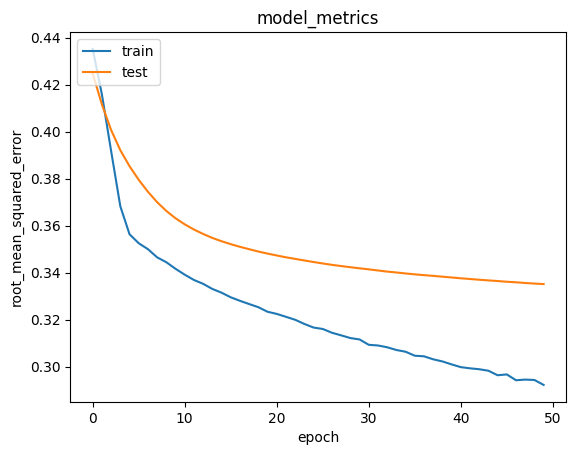

In [61]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Berdasarkan hasil visualisasi metrik evaluasi RMSE terhadap model yang dikembangkan, terlihat bahwa model konvergen pada sekitar **50 epochs**. Plot metrik model menunjukkan bahwa nilai **RMSE** cukup kecil, dengan error akhir sebesar **0.2928** untuk data pelatihan dan **0.3351** untuk data validasi. Nilai tersebut menunjukkan bahwa model memberikan hasil yang cukup baik untuk sistem rekomendasi yang dihasilkan.

Semakin kecil nilai **RMSE**, semakin baik model dalam memprediksi preferensi pengguna terhadap item. Oleh karena itu, nilai RMSE yang rendah ini menunjukkan bahwa model dapat menghasilkan rekomendasi yang sangat akurat, mencerminkan kemampuan model dalam memahami dan memprediksi preferensi pengguna secara efektif.